In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Normalization
from sklearn.model_selection import train_test_split

import librosa
from pydub import AudioSegment

import data_utils
from model import CnnModel, LSTMModel
from experiment import Experiment

In [3]:
data_dir_path = "./data/recordings/"

epochs = 100
batch_size=32
optimizer="Adam"

label_count=10

In [4]:
import os
X = []
y = []
for root, _, files in os.walk(data_dir_path):
    for file in files:
        file_path = os.path.join(root, file)
        X.append(file_path)
        y.append(file.split("_")[0])

In [5]:
data = {'File_Path': X,
        'Label': y}
df = pd.DataFrame(data)
df

,File_Path,Label
0,./data/recordings/0_george_0.wav,0
1,./data/recordings/0_george_1.wav,0
2,./data/recordings/0_george_10.wav,0
3,./data/recordings/0_george_11.wav,0
4,./data/recordings/0_george_12.wav,0
...,...,...
2995,./data/recordings/9_yweweler_5.wav,9
2996,./data/recordings/9_yweweler_6.wav,9
2997,./data/recordings/9_yweweler_7.wav,9
2998,./data/recordings/9_yweweler_8.wav,9


In [6]:
np.random.shuffle(df.values)
df

,File_Path,Label
0,./data/recordings/9_nicolas_19.wav,9
1,./data/recordings/9_lucas_5.wav,9
2,./data/recordings/7_george_44.wav,7
3,./data/recordings/1_yweweler_39.wav,1
4,./data/recordings/2_theo_9.wav,2
...,...,...
2995,./data/recordings/8_yweweler_48.wav,8
2996,./data/recordings/0_theo_34.wav,0
2997,./data/recordings/9_jackson_6.wav,9
2998,./data/recordings/6_george_49.wav,6


In [7]:
durations = []
for x in df.File_Path:
    song = AudioSegment.from_wav(x)
    durations.append(float(format(song.duration_seconds, '.1f')))

print(f'Max duration: {max(durations)}')
print(f'mean = {np.mean(durations)}')
print(f'median = {np.median(durations)}')

Max duration: 2.3
mean = 0.43666666666666665
median = 0.4


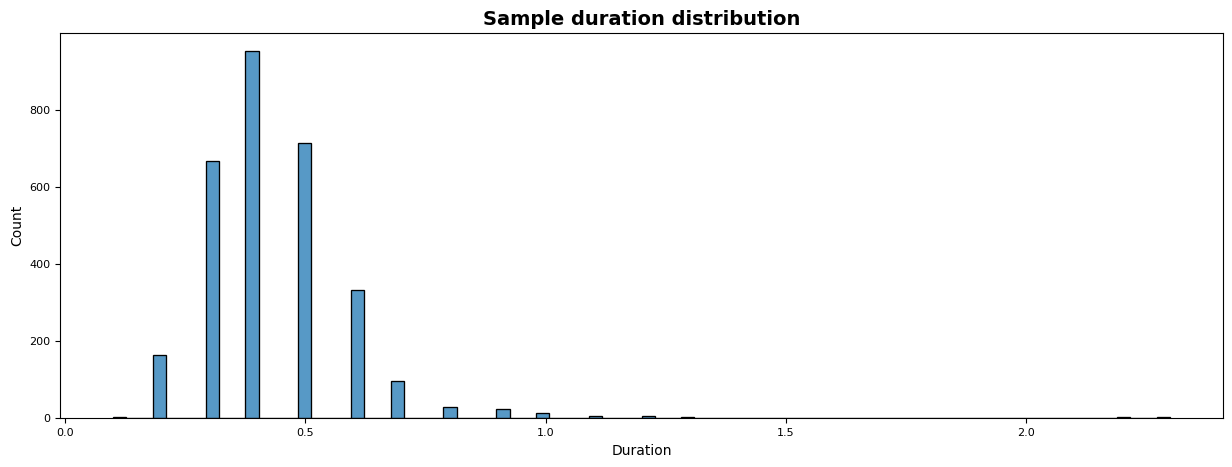

In [8]:
plt.figure(figsize=(15,5))
sns.histplot(durations)
plt.title('Sample duration distribution', fontsize=14, fontweight='bold')
plt.xlabel('Duration', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tick_params(axis='both',labelsize=8)
plt.show()

In [9]:
sample_duration = 0.75
X, y =  data_utils.prepare_dataset(df, label_count=label_count, duration=sample_duration, feature_type='mfcc', n_mfcc=40)

In [10]:
X.shape

(3000, 40, 33)

In [11]:
y.shape

(3000, 10)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

Normalize dataset

In [14]:
norm = Normalization(axis=None)
norm.adapt(X_train)
X_train = norm(X_train).numpy()
X_val = norm(X_val).numpy()
X_test = norm(X_test).numpy()

Train and test LSTM Model

In [15]:
model = LSTMModel(input_shape = X_train.shape[1:], labels = label_count)

model.compile( 
              optimizer="Adam", 
              loss="categorical_crossentropy",
              metrics=['accuracy'])

experiment = Experiment(model, batch_size=batch_size, epochs=epochs, optimizer=optimizer)
history = experiment.train(X_train, X_val, y_train, y_val)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.0896 - loss: 2.3045 - val_accuracy: 0.1214 - val_loss: 2.3040
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1329 - loss: 2.2963 - val_accuracy: 0.1548 - val_loss: 2.2788
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1660 - loss: 2.2618 - val_accuracy: 0.2119 - val_loss: 2.1046
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2243 - loss: 2.0998 - val_accuracy: 0.2548 - val_loss: 1.9750
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2654 - loss: 1.9368 - val_accuracy: 0.3119 - val_loss: 1.8339
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3162 - loss: 1.8234 - val_accuracy: 0.3333 - val_loss: 1.7694
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3691 - loss: 1.7095 - val_accuracy: 0.3905 - val_loss: 1.7090
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3834 - loss: 1.6499 - val_accuracy: 0.

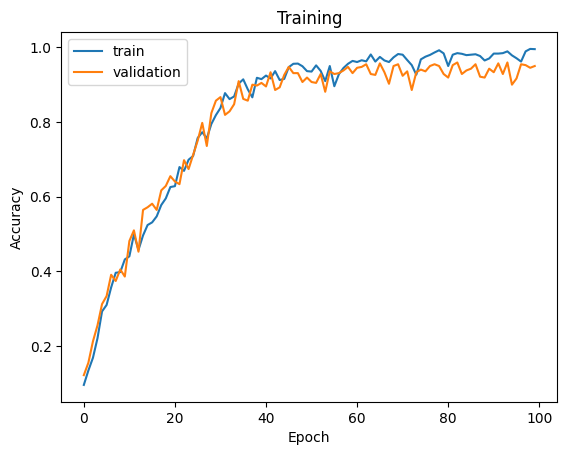

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

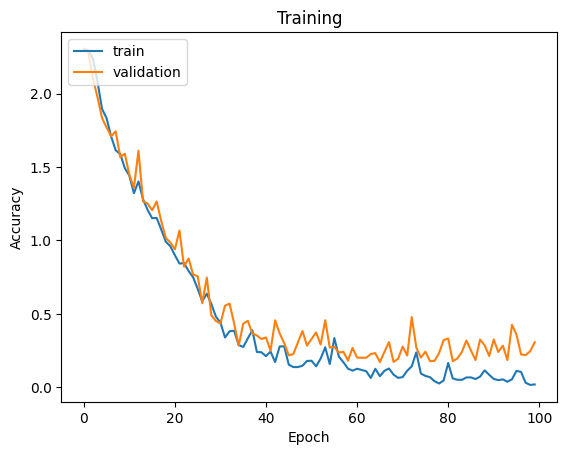

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
f1 score macro: 0.9293926950137721
f1 score micro: 0.9288888888888889
f1 score weighted: 0.9287403908119886

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.95      0.95      0.95        92
           2       0.93      0.92      0.92        86
           3       0.89      0.82      0.86       101
           4       0.94      0.98      0.96        83
           5       0.84      0.97      0.90        89
           6       0.92      0.89      0.90        74
           7       0.90      0.93      0.92       100
           8       0.96      0.96      0.96        83
           9       0.99      0.90      0.94        98

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



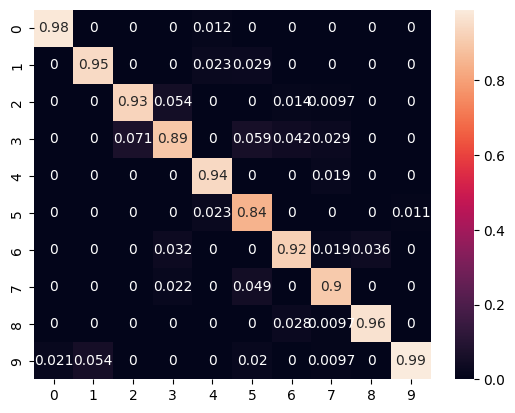

In [18]:
experiment.test(X_test, y_test)

In [27]:
sample_duration = 0.75
X, y =  data_utils.prepare_dataset(df, label_count=label_count, duration=sample_duration, feature_type='mfcc')

In [28]:
X=X[:,:,:,None]
X.shape

(3000, 128, 33, 1)

In [29]:
y.shape

(3000, 10)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

Train and test CNN Model

In [31]:
model = CnnModel(input_shape = X_train.shape[1:], labels = label_count)

model.compile( 
              optimizer="Adam", 
              loss="categorical_crossentropy",
              metrics=['accuracy'])

experiment = Experiment(model, batch_size=batch_size, epochs=epochs, optimizer=optimizer)
history = experiment.train(X_train, X_val, y_train, y_val)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.1375 - loss: 3.4912 - val_accuracy: 0.2000 - val_loss: 2.2667
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.1644 - loss: 2.2242 - val_accuracy: 0.3548 - val_loss: 1.8535
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.2939 - loss: 1.8537 - val_accuracy: 0.4190 - val_loss: 1.4450
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4767 - loss: 1.3546 - val_accuracy: 0.7238 - val_loss: 0.7814
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.6283 - loss: 0.9577 - val_accuracy: 0.8976 - val_loss: 0.4365
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7205 - loss: 0.7535 - val_accuracy: 0.9405 - val_loss: 0.2468
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8654 - loss: 0.4043 - val_accuracy: 0.9167 - val_loss: 0.2532
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9138 - loss: 0.3093 - val_accuracy: 0.

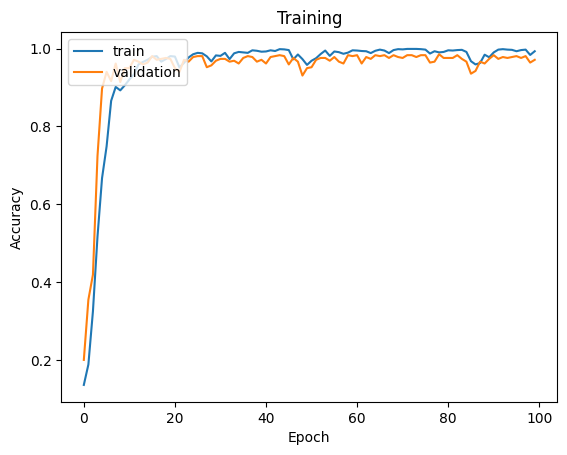

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

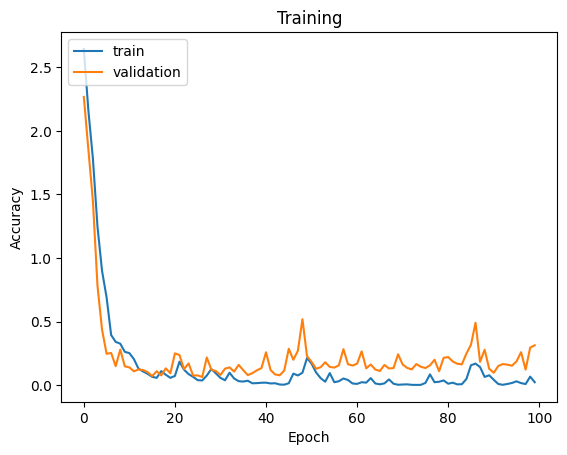

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
f1 score macro: 0.9808698937081427
f1 score micro: 0.9811111111111112
f1 score weighted: 0.9812708104479656

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      0.98      0.99        84
           2       0.90      1.00      0.95        81
           3       0.99      0.94      0.97        89
           4       1.00      1.00      1.00        88
           5       0.97      0.99      0.98        90
           6       0.96      0.98      0.97        82
           7       0.99      0.96      0.98       106
           8       1.00      0.99      0.99        97
           9       1.00      0.98      0.99        94

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



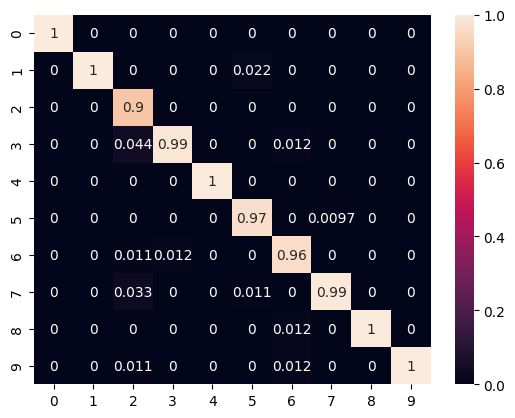

In [34]:
experiment.test(X_test, y_test)